## Mitsiu Alejandro Carreño Sarabia - E23S-18014

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_ocup = pd.read_excel("s10_inegi_ocup.xls")
# Remove headers from the file
df_ocup = df_ocup.iloc[4:77]
# Rename the columns
df_ocup = df_ocup.rename(columns={'Instituto Nacional de Estadística y Geografía (INEGI)': 'year', 'Unnamed: 1': 'tot'})
df_ocup
df_ocup["year"] = df_ocup["year"].astype("string")
df_ocup["year"] = df_ocup["year"].str.replace(r'/[0-9][0-9]', '')
df_ocup["year"] = df_ocup["year"].astype("int64")
df_ocup

/tmp/ipykernel_26739/3935050449.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ocup["year"] = df_ocup["year"].str.replace(r'/[0-9][0-9]', '')


,year,tot
4,2005,43099847
5,2005,43180433
6,2005,44000204
7,2005,44245519
8,2006,44306012
...,...,...
72,2022,58085314
73,2022,59338419
74,2022,59480471
75,2022,60145456


In [2]:
df_ocup_group = df_ocup.groupby("year", as_index=False)["tot"].max()
df_ocup_group

,year,tot
0,2005,44245519
1,2006,45580994
2,2007,46868952
3,2008,46964082
4,2009,48903792
5,2010,49190032
6,2011,50772496
7,2012,51927050
8,2013,51506922
9,2014,51364782


<AxesSubplot: xlabel='year'>

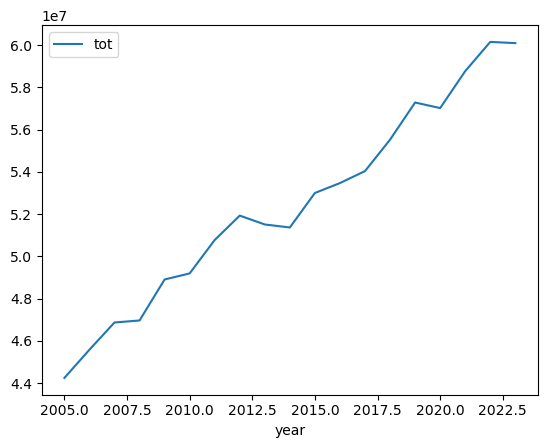

In [3]:

df_ocup_group.plot(x="year", y="tot")

In [4]:
# Moodle no me permitió subir el csv porque excede el límite de espacio, pero lo descargue de aquí
# https://www.inegi.org.mx/contenidos/masiva/indicadores/programas/ccpv/2020/cpv_00_csv.zip
df_pob = pd.read_csv("s10_inegi_pob.csv")
# Filtramos datos a nivel nacional y de población total
df_pob = df_pob.query("cve_entidad == 0 & id_indicador == 1002000001")[["año", "valor"]]
df_pob

,año,valor
1,1910,15160369
2,1921,14334780
3,1930,16552722
4,1940,19653552
5,1950,25791017
6,1960,34923129
7,1970,48225238
8,1980,66846833
9,1990,81249645
10,1995,91158290


/tmp/ipykernel_26739/2966393209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pob["valor"] = df_pob["valor"].astype("float")


<AxesSubplot: xlabel='año'>

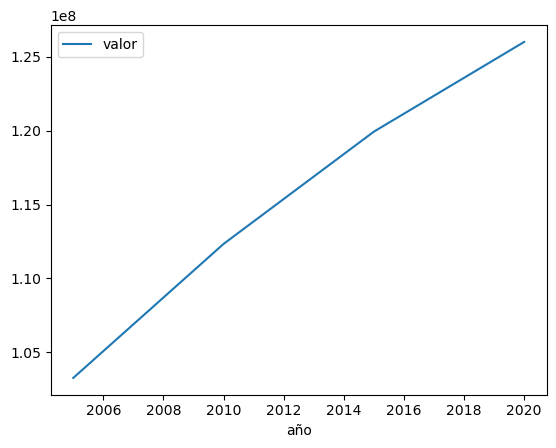

In [5]:
df_pob = df_pob.query("año > 2000")
df_pob["valor"] = df_pob["valor"].astype("float")
df_pob.plot(x="año", y="valor")


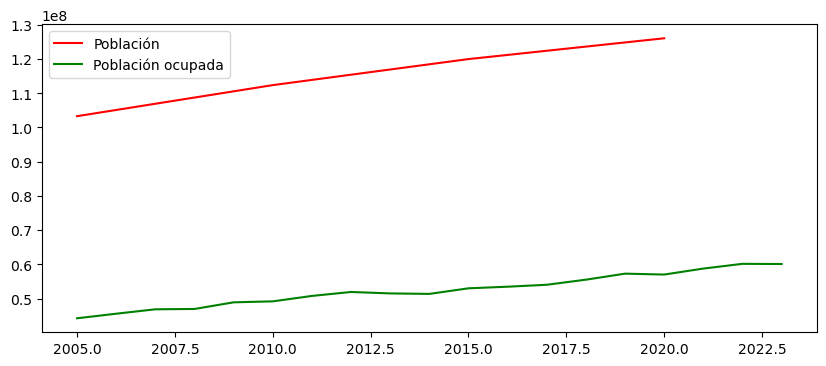

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.plot(df_pob["año"], df_pob["valor"], "r", label="Población")
ax.plot(df_ocup_group["year"], df_ocup_group["tot"], "g", label="Población ocupada")
ax.legend()

In [7]:
def scipyFourier(values):
    acc_fft = sp.fftpack.fft(np.array(values))
    acc_psd = np.abs(acc_fft) **2

    fftfreq = sp.fftpack.fftfreq(len(acc_psd), 1./12)

    i = fftfreq > 0
    '''
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    ax.plot(fftfreq[i], 10* np.log10(acc_psd[i]))
    ax.set_xlim(0,5)
    ax.set_xlabel("Frequency (1/year)")
    ax.set_ylabel("PSD (dB)")
    '''
    acc_fft_bis = acc_fft.copy()
    acc_fft_bis[np.abs(fftfreq) > 1.1 ] = 0

    acc_slow = np.real(sp.fftpack.ifft(acc_fft_bis))
    return acc_slow

def npFourier(values):
    # Calcular la transformada de Fourier
    fft = np.fft.fft(values)
    frecuencias = np.fft.fftfreq(len(values))
    #print(frecuencias)

    # Calcular el espectro de amplitud
    espectro_amplitud = np.abs(fft)
    #fase = np.angle(fft);     # New
    #print(espectro_amplitud)

    # Obtener el índice de las frecuencias principales
    indices_principales = np.argsort(espectro_amplitud)[::-1]
    #print(indices_principales)

    # Filtrar las frecuencias principales 
    num_frecuencias_a_considerar = int(len(values) * 0.12)  # considerando el 10% de las frecuencias
    fft_filtrado = np.zeros_like(fft)
    fft_filtrado[indices_principales[:num_frecuencias_a_considerar]] = fft[indices_principales[:num_frecuencias_a_considerar]]

    # Calcular la transformada inversa de Fourier
    serie_suavizada = np.fft.ifft(fft_filtrado).real
    return serie_suavizada

In [51]:
pob_suav = npFourier(df_pob['valor'].values)
ocup_suav = npFourier(df_ocup_group['tot'].values)